## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  75.148101  1485.211903  0.787041  9.848234  1171.381080
1  84.486979   881.055528  0.924865  5.895511   819.280246
2  39.228288   304.361416  0.270167  4.733116    91.188850
3  35.172662   166.290999  0.342430  5.498474    66.872875
4  94.184122  1063.633897  0.410201  6.647073   446.229814


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9706772	total: 57.4ms	remaining: 57.4s
1:	learn: 0.9612338	total: 58ms	remaining: 28.9s
2:	learn: 0.9515438	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9429471	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9301651	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9190208	total: 60.7ms	remaining: 10s
6:	learn: 0.9071115	total: 61.2ms	remaining: 8.68s
7:	learn: 0.8955734	total: 61.6ms	remaining: 7.64s
8:	learn: 0.8856330	total: 62.1ms	remaining: 6.83s
9:	learn: 0.8729175	total: 62.5ms	remaining: 6.19s
10:	learn: 0.8627795	total: 63.1ms	remaining: 5.67s
11:	learn: 0.8514189	total: 63.5ms	remaining: 5.23s
12:	learn: 0.8410172	total: 64.1ms	remaining: 4.87s
13:	learn: 0.8290059	total: 64.8ms	remaining: 4.56s
14:	learn: 0.8187101	total: 65.2ms	remaining: 4.28s
15:	learn: 0.8092378	total: 65.6ms	remaining: 4.03s
16:	learn: 0.7985530	total: 66.1ms	remaining: 3.82s
17:	learn: 0.7892690	total: 66.6ms	remaining: 3.63s
18:	learn: 0.7818699	total: 67ms	remaining: 3.46

117:	learn: 0.2566256	total: 108ms	remaining: 806ms
118:	learn: 0.2536144	total: 108ms	remaining: 803ms
119:	learn: 0.2512983	total: 109ms	remaining: 798ms
120:	learn: 0.2488795	total: 109ms	remaining: 793ms
121:	learn: 0.2456808	total: 110ms	remaining: 788ms
122:	learn: 0.2437795	total: 110ms	remaining: 784ms
123:	learn: 0.2417920	total: 110ms	remaining: 779ms
124:	learn: 0.2394950	total: 111ms	remaining: 775ms
125:	learn: 0.2379880	total: 111ms	remaining: 770ms
126:	learn: 0.2365416	total: 111ms	remaining: 766ms
127:	learn: 0.2340682	total: 112ms	remaining: 762ms
128:	learn: 0.2319988	total: 112ms	remaining: 758ms
129:	learn: 0.2304669	total: 113ms	remaining: 754ms
130:	learn: 0.2288548	total: 113ms	remaining: 751ms
131:	learn: 0.2264828	total: 114ms	remaining: 748ms
132:	learn: 0.2247006	total: 114ms	remaining: 745ms
133:	learn: 0.2228482	total: 115ms	remaining: 741ms
134:	learn: 0.2208627	total: 115ms	remaining: 737ms
135:	learn: 0.2191055	total: 115ms	remaining: 733ms
136:	learn: 

299:	learn: 0.0784557	total: 185ms	remaining: 432ms
300:	learn: 0.0782310	total: 186ms	remaining: 431ms
301:	learn: 0.0779884	total: 186ms	remaining: 430ms
302:	learn: 0.0777582	total: 186ms	remaining: 429ms
303:	learn: 0.0774913	total: 187ms	remaining: 427ms
304:	learn: 0.0772571	total: 187ms	remaining: 426ms
305:	learn: 0.0767542	total: 188ms	remaining: 425ms
306:	learn: 0.0760631	total: 188ms	remaining: 424ms
307:	learn: 0.0758268	total: 188ms	remaining: 423ms
308:	learn: 0.0756044	total: 189ms	remaining: 422ms
309:	learn: 0.0752395	total: 189ms	remaining: 421ms
310:	learn: 0.0747258	total: 189ms	remaining: 420ms
311:	learn: 0.0745165	total: 190ms	remaining: 420ms
312:	learn: 0.0743132	total: 191ms	remaining: 419ms
313:	learn: 0.0740977	total: 191ms	remaining: 418ms
314:	learn: 0.0738837	total: 192ms	remaining: 417ms
315:	learn: 0.0736856	total: 192ms	remaining: 416ms
316:	learn: 0.0730837	total: 192ms	remaining: 415ms
317:	learn: 0.0728797	total: 193ms	remaining: 414ms
318:	learn: 

533:	learn: 0.0277870	total: 289ms	remaining: 252ms
534:	learn: 0.0276633	total: 290ms	remaining: 252ms
535:	learn: 0.0276279	total: 290ms	remaining: 251ms
536:	learn: 0.0275064	total: 291ms	remaining: 251ms
537:	learn: 0.0273646	total: 291ms	remaining: 250ms
538:	learn: 0.0273260	total: 291ms	remaining: 249ms
539:	learn: 0.0271910	total: 292ms	remaining: 249ms
540:	learn: 0.0270530	total: 292ms	remaining: 248ms
541:	learn: 0.0269376	total: 293ms	remaining: 247ms
542:	learn: 0.0268399	total: 293ms	remaining: 247ms
543:	learn: 0.0267194	total: 293ms	remaining: 246ms
544:	learn: 0.0266827	total: 294ms	remaining: 245ms
545:	learn: 0.0265676	total: 294ms	remaining: 244ms
546:	learn: 0.0264727	total: 294ms	remaining: 244ms
547:	learn: 0.0263601	total: 295ms	remaining: 243ms
548:	learn: 0.0262196	total: 295ms	remaining: 242ms
549:	learn: 0.0261877	total: 295ms	remaining: 242ms
550:	learn: 0.0261528	total: 296ms	remaining: 241ms
551:	learn: 0.0260406	total: 296ms	remaining: 240ms
552:	learn: 

723:	learn: 0.0156938	total: 365ms	remaining: 139ms
724:	learn: 0.0156329	total: 366ms	remaining: 139ms
725:	learn: 0.0155879	total: 366ms	remaining: 138ms
726:	learn: 0.0155177	total: 367ms	remaining: 138ms
727:	learn: 0.0154738	total: 367ms	remaining: 137ms
728:	learn: 0.0154297	total: 367ms	remaining: 137ms
729:	learn: 0.0153709	total: 368ms	remaining: 136ms
730:	learn: 0.0153390	total: 368ms	remaining: 136ms
731:	learn: 0.0152664	total: 369ms	remaining: 135ms
732:	learn: 0.0151952	total: 369ms	remaining: 135ms
733:	learn: 0.0151211	total: 370ms	remaining: 134ms
734:	learn: 0.0150487	total: 370ms	remaining: 133ms
735:	learn: 0.0149779	total: 371ms	remaining: 133ms
736:	learn: 0.0149089	total: 371ms	remaining: 132ms
737:	learn: 0.0148397	total: 372ms	remaining: 132ms
738:	learn: 0.0147724	total: 372ms	remaining: 131ms
739:	learn: 0.0147212	total: 373ms	remaining: 131ms
740:	learn: 0.0146474	total: 373ms	remaining: 130ms
741:	learn: 0.0145820	total: 373ms	remaining: 130ms
742:	learn: 

964:	learn: 0.0057355	total: 470ms	remaining: 17ms
965:	learn: 0.0057259	total: 470ms	remaining: 16.5ms
966:	learn: 0.0057086	total: 471ms	remaining: 16.1ms
967:	learn: 0.0056873	total: 471ms	remaining: 15.6ms
968:	learn: 0.0056610	total: 472ms	remaining: 15.1ms
969:	learn: 0.0056400	total: 472ms	remaining: 14.6ms
970:	learn: 0.0056180	total: 472ms	remaining: 14.1ms
971:	learn: 0.0056088	total: 473ms	remaining: 13.6ms
972:	learn: 0.0055922	total: 473ms	remaining: 13.1ms
973:	learn: 0.0055758	total: 474ms	remaining: 12.6ms
974:	learn: 0.0055553	total: 474ms	remaining: 12.2ms
975:	learn: 0.0055320	total: 474ms	remaining: 11.7ms
976:	learn: 0.0055160	total: 475ms	remaining: 11.2ms
977:	learn: 0.0054915	total: 475ms	remaining: 10.7ms
978:	learn: 0.0054757	total: 476ms	remaining: 10.2ms
979:	learn: 0.0054532	total: 476ms	remaining: 9.72ms
980:	learn: 0.0054375	total: 477ms	remaining: 9.23ms
981:	learn: 0.0054168	total: 477ms	remaining: 8.75ms
982:	learn: 0.0053948	total: 478ms	remaining: 8.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

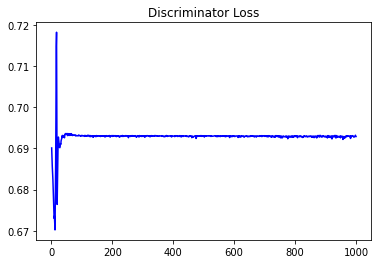

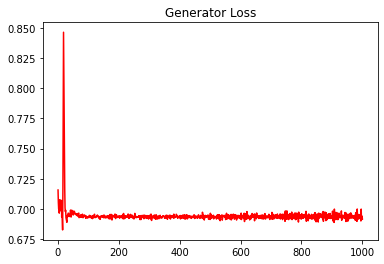

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0052665849194873755


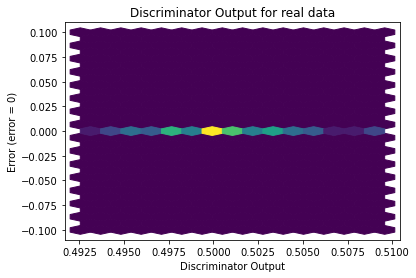

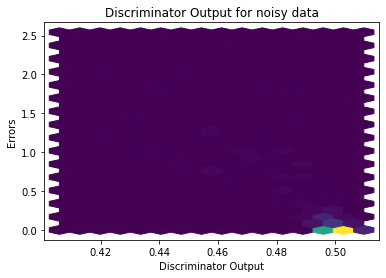

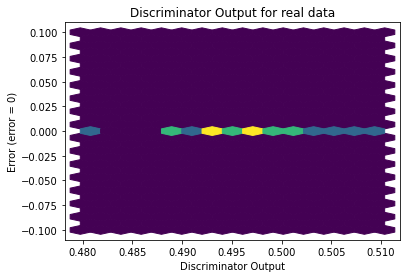

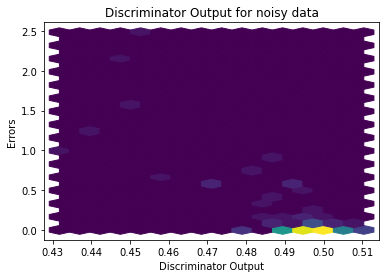

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


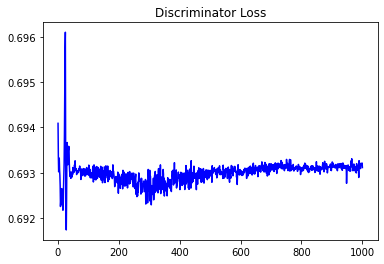

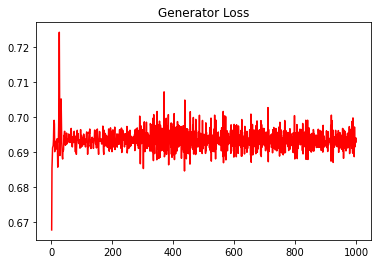

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.011264849375132181


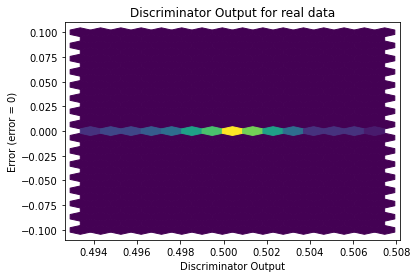

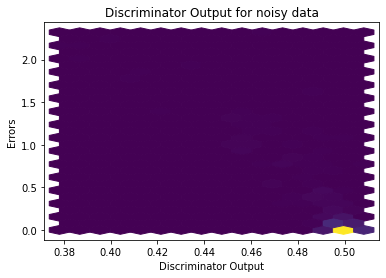

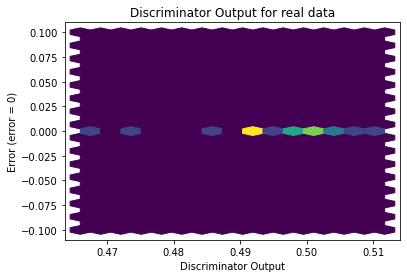

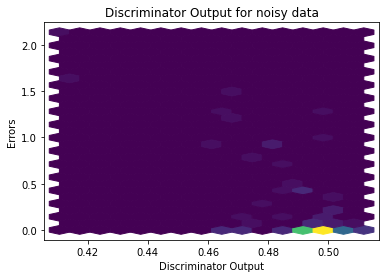

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1170]], requires_grad=True)
